# Import Libraries

In [1]:
import sys
sys.path.insert(0, "../lisko_getting_wp/UAV/")
from datetime import datetime

In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [51]:
DEFAULT_ALT = 488.0 

In [4]:
from UAV import UAV

In [5]:
def load_data(ulog_sim_id, ulog_dir = "../simulation_analysis/sim_ulogs/gazebo/"):
    print(ulog_sim_id, ulog_dir)
    uav_sim = UAV(ulog_id=ulog_sim_id, ulog_dir=ulog_dir)
    ulog_id_real = ulog_sim_id.split("_")[-1]
    pattern = ulog_sim_id.split("_")[0]
    uav_real = UAV(ulog_id_real, f"../lisko_getting_wp/saved_waypoints/ulog_patterns/{pattern}/")
    uav_sim.set_all_data()
    uav_real.set_all_data()
    return uav_sim, uav_real

def rebase_timestamps(df):
    new_indices = []
    base_time = df.index[0]
    
    for time in df.index:
        new_indices.append(time - base_time)
    return new_indices

def create_dfs(uav_sim, uav_real):
    # get local data
    local_dict_sim = uav_sim.create_data_dict(True)["local"]
    local_dict_real = uav_real.create_data_dict(True)["local"]
    # get coords
    coords_sim = local_dict_sim["local_coords"]
    coords_real = local_dict_real["local_coords"]
    
    # Get UAV status
    coords_sim.update({"status":local_dict_sim["uav_status"]})
    coords_real.update({"status":local_dict_real["uav_status"]})
    
    # Set time stamps
    df_sim = pd.DataFrame.from_dict(coords_sim)
    df_sim.index = uav_sim.get_time_stamp("vehicle_local_position")
    df_real = pd.DataFrame.from_dict(coords_real)
    df_real.index = uav_real.get_time_stamp("vehicle_local_position")
    return df_sim, df_real

def grab_status(df_sim, df_real, uav_status):
    toPlot_sim = df_sim[df_sim.status == uav_status]
    toPlot_real = df_real[df_real.status == uav_status]
    toPlot_real.index = rebase_timestamps(toPlot_real)
    toPlot_sim.index = rebase_timestamps(toPlot_sim)
    
    return toPlot_sim, toPlot_real

In [6]:
ulog_dir = "./sim_ulogs/gazebo/"
ulog_sim_ids = os.listdir(ulog_dir)
ulog_sim_ids

['square_378d3a42-4a6d-4e1d-9fd9-1d1bf6a8a7c6.ulg',
 'circle_19925825-9e32-46fc-bdd8-903bd278ec1f.ulg']

In [29]:
uav_sim.data_set.data.keys()

dict_keys(['timestamp', 'timestamp_sample', 'ref_timestamp', 'ref_lat', 'ref_lon', 'x', 'y', 'z', 'delta_xy[0]', 'delta_xy[1]', 'delta_z', 'vx', 'vy', 'vz', 'z_deriv', 'delta_vxy[0]', 'delta_vxy[1]', 'delta_vz', 'ax', 'ay', 'az', 'heading', 'delta_heading', 'ref_alt', 'dist_bottom', 'eph', 'epv', 'evh', 'evv', 'vxy_max', 'vz_max', 'hagl_min', 'hagl_max', 'xy_valid', 'z_valid', 'v_xy_valid', 'v_z_valid', 'xy_reset_counter', 'z_reset_counter', 'vxy_reset_counter', 'vz_reset_counter', 'heading_reset_counter', 'heading_good_for_control', 'xy_global', 'z_global', 'dist_bottom_valid', 'dist_bottom_sensor_bitfield', 'dead_reckoning'])

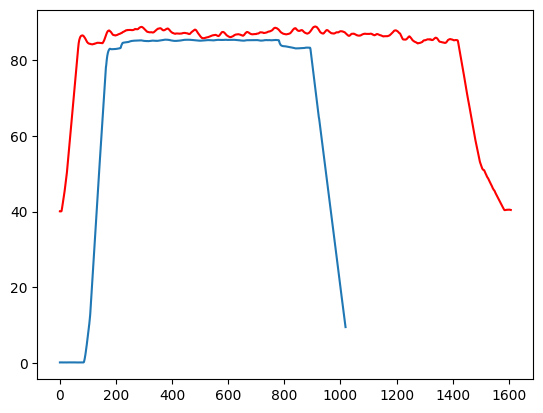

In [55]:
uav_real.set_dataset("vehicle_gps_position")
uav_sim.set_dataset("vehicle_gps_position")
data_real = uav_real.data_set.data["alt"]*  0.001
data_sim = uav_sim.data_set.data["alt"] * 0.001
plt.plot(data_sim - DEFAULT_ALT)
plt.plot(data_real, color="red")

In [50]:
data_sim = uav_sim.data_set.data["alt"] * 0.001
max(data_sim - DEAFULT_ALT)

85.49400000000003

In [49]:
max(data_real * 0.001)

88.483

In [7]:
uav_sim, uav_real = load_data(ulog_sim_ids[0].strip(".ugl"))
df_sim, df_real = create_dfs(uav_sim, uav_real)
toPlot_sim, toPlot_real = grab_status(df_sim, df_real, 3)

square_378d3a42-4a6d-4e1d-9fd9-1d1bf6a8a7c6 ../simulation_analysis/sim_ulogs/gazebo/
ABS /Users/daniellisko/GitRepos/Px4-Batch-Simulation/Px4_Simulations/simulation_analysis/sim_ulogs/gazebo
ABS /Users/daniellisko/GitRepos/Px4-Batch-Simulation/Px4_Simulations/lisko_getting_wp/saved_waypoints/ulog_patterns/square


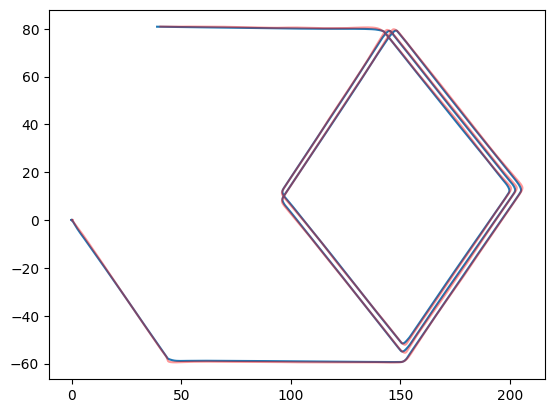

In [8]:
plt.plot(toPlot_sim["x"], toPlot_sim["y"])
plt.plot(toPlot_real["x"], toPlot_real["y"], color="red", alpha=0.4)

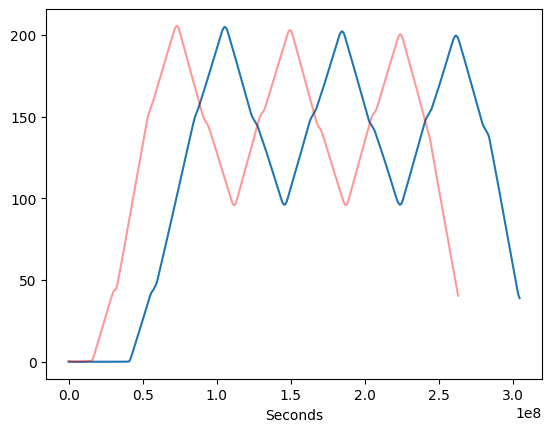

In [12]:
plt.plot(toPlot_sim["x"].index, toPlot_sim["x"])
plt.plot(toPlot_real["x"], color="red", alpha=0.4)
plt.xlabel("Seconds")
plt.show()

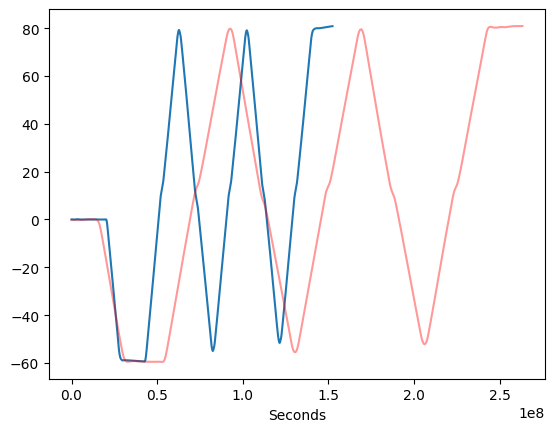

In [10]:
plt.plot(toPlot_sim["y"].index // 2, toPlot_sim["y"])
plt.plot(toPlot_real["y"], color="red", alpha=0.4)
plt.xlabel("Seconds")
plt.show()

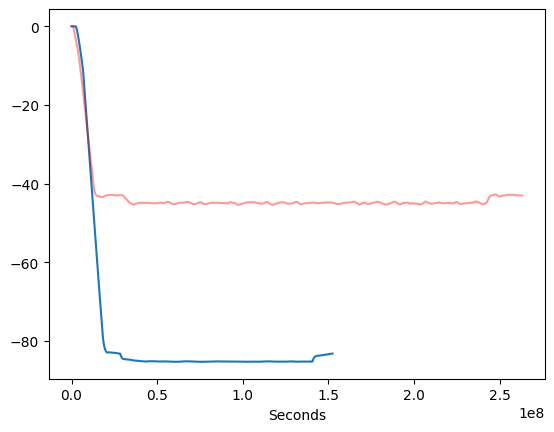

In [13]:
plt.plot(toPlot_sim["z"].index // 2, toPlot_sim["z"])
plt.plot(toPlot_real["z"], color="red", alpha=0.4)
plt.xlabel("Seconds")
plt.show()

In [13]:
uav_sim, uav_real = load_data(ulog_sim_ids[1].strip(".ugl"))
df_sim, df_real = create_dfs(uav_sim, uav_real)
toPlot_sim, toPlot_real = grab_status(df_sim, df_real, 3)

circle_19925825-9e32-46fc-bdd8-903bd278ec1f ../simulation_analysis/sim_ulogs/gazebo/
ABS /Users/daniellisko/GitRepos/Px4-Batch-Simulation/Px4_Simulations/simulation_analysis/sim_ulogs/gazebo
ABS /Users/daniellisko/GitRepos/Px4-Batch-Simulation/Px4_Simulations/lisko_getting_wp/saved_waypoints/ulog_patterns/circle


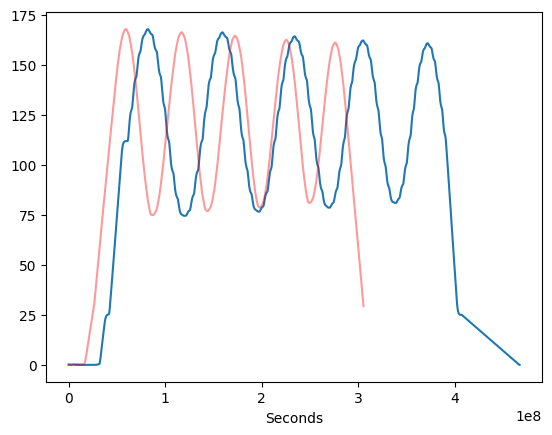

In [14]:
plt.plot(toPlot_sim["x"].index / 1.45, toPlot_sim["x"])
plt.plot(toPlot_real["x"].index, toPlot_real["x"], color="red", alpha=0.4)
plt.xlabel("Seconds")
plt.show()

In [15]:
print(len(toPlot_real), len(toPlot_sim))

2999 73915


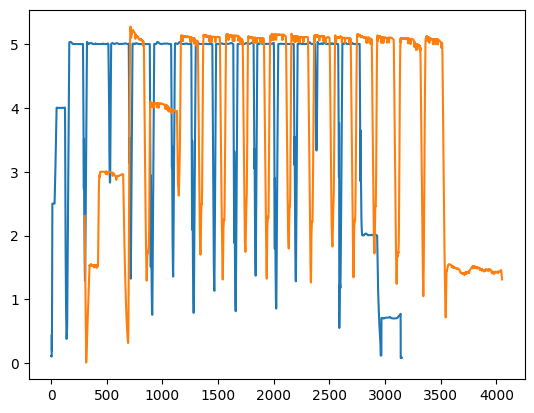

In [35]:
plt.plot(uav_real.get_pt_velocities())
plt.plot(uav_sim.get_pt_velocities())

In [39]:
len(uav_real.get_pt_velocities())

3151

In [63]:
uav_real.set_dataset("vehicle_local_position")
uav_sim.set_dataset("vehicle_local_position")

In [64]:
uav_real.data_set.data["vx"] 
speeds_r = np.sqrt(np.square(uav_real.data_set.data["vx"] ) + np.square(uav_real.data_set.data["vy"] ) + np.square(uav_real.data_set.data["vz"] ))
speeds_sim = np.sqrt(np.square(uav_sim.data_set.data["vx"] ) + np.square(uav_sim.data_set.data["vy"] ) + np.square(uav_sim.data_set.data["vz"] ))

In [101]:
df1 = pd.DataFrame.from_dict(speeds_r)
df1.index = uav_real.get_time_stamp("vehicle_local_position")
df1["status"] = uav_real.modes_nearest_indices("vehicle_local_position")
df1 = df1[df1.status == 3]
df1.index = rebase_timestamps(df1)

df2 = pd.DataFrame.from_dict(speeds_sim)
df2.index = uav_sim.get_time_stamp("vehicle_local_position")
df2["status"] = uav_sim.modes_nearest_indices("vehicle_local_position")
df2 =  df2[df2.status == 3]
df2.index = rebase_timestamps(df2)

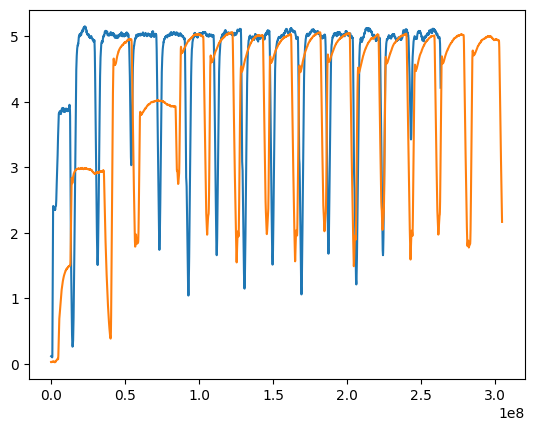

In [124]:
plt.plot(df1.index, df1[0])
plt.plot(df2.index ,df2[0])